In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
#!pip install yfinance --upgrade --no-cache-dir

In [87]:
#!pip install git+https://github.com/bukosabino/ta.git
#!C:\Users\Utilizador\anaconda3\envs\dl\python.exe -m pip install --upgrade pip

In [88]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import get_scorer, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 

In [89]:
# List of cryptocurrencies to fetch
crypto_list = "ADA-USD ATOM-USD AVAX-USD AXS-USD BTC-USD ETH-USD LINK-USD LUNA1-USD MATIC-USD SOL-USD"

# List of major indices to fetch
major_world_indices_list = "^GSPC ^DJI ^IXIC ^NYA ^XAX ^BUK100P ^RUT ^VIX ^FTSE ^GDAXI ^FCHI ^STOXX50E ^N100 ^BFX IMOEX.ME ^N225 ^HSI 000001.SS 399001.SZ ^STI ^AXJO ^AORD ^BSESN ^JKSE ^KLSE ^NZ50 ^KS11 ^TWII ^GSPTSE ^BVSP ^MXX ^IPSA ^MERV ^TA125.TA ^CASE30 ^JN0U.JO"

# List of currency indices to fetch
currency_indices_list = "EURUSD=X JPY=X GBPUSD=X AUDUSD=X NZDUSD=X GBPJPY=X EURGBP=X EURCAD=X EURSEK=X EURCHF=X EURHUF=X EURJPY=X CNY=X HKD=X SGD=X INR=X MXN=X PHP=X IDR=X THB=X MYR=X ZAR=X RUB=X"

# Concatenating the indices
all_lists = crypto_list+" "+major_world_indices_list+" "+currency_indices_list

In [90]:
# Creating an array with every index
all_indices_array = all_lists.split(" ")

# all crypto indices
crypto_indices = all_indices_array[:10]
print(crypto_indices)

['ADA-USD', 'ATOM-USD', 'AVAX-USD', 'AXS-USD', 'BTC-USD', 'ETH-USD', 'LINK-USD', 'LUNA1-USD', 'MATIC-USD', 'SOL-USD']


In [91]:
# all major world indices
major_world_indices = all_indices_array[10:46]
print(major_world_indices)

['^GSPC', '^DJI', '^IXIC', '^NYA', '^XAX', '^BUK100P', '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', 'IMOEX.ME', '^N225', '^HSI', '000001.SS', '399001.SZ', '^STI', '^AXJO', '^AORD', '^BSESN', '^JKSE', '^KLSE', '^NZ50', '^KS11', '^TWII', '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^MERV', '^TA125.TA', '^CASE30', '^JN0U.JO']


In [92]:
# all currency indices
currency_indices = all_indices_array[46:]
print(currency_indices)

['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'NZDUSD=X', 'GBPJPY=X', 'EURGBP=X', 'EURCAD=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X', 'EURJPY=X', 'CNY=X', 'HKD=X', 'SGD=X', 'INR=X', 'MXN=X', 'PHP=X', 'IDR=X', 'THB=X', 'MYR=X', 'ZAR=X', 'RUB=X']


In [93]:
all_data = yf.download(all_lists, period="max", interval="1d", actions=False)

[*********************100%***********************]  69 of 69 completed


In [94]:
all_data

Adj Close                                               \
              000001.SS     399001.SZ   ADA-USD   ATOM-USD  AUDUSD=X   
Date                                                                   
1950-01-03          NaN           NaN       NaN        NaN       NaN   
1950-01-04          NaN           NaN       NaN        NaN       NaN   
1950-01-05          NaN           NaN       NaN        NaN       NaN   
1950-01-06          NaN           NaN       NaN        NaN       NaN   
1950-01-09          NaN           NaN       NaN        NaN       NaN   
...                 ...           ...       ...        ...       ...   
2022-05-25  3107.459961  11143.179688  0.513877  10.739818  0.710320   
2022-05-26  3123.110107  11206.820312  0.480883   9.643618  0.708940   
2022-05-27  3130.239990  11193.589844  0.455507   9.252514  0.709879   
2022-05-28          NaN           NaN  0.455911   9.414568       NaN   
2022-05-29          NaN           NaN  0.476361   9.545130       NaN   

                                                                     ...  \
             AVAX-USD    AXS-USD       BTC-USD   CNY=X      ETH-USD  ...   
Date                                                                 ...   
1950-01-03        NaN        NaN           NaN     NaN          NaN  ...   
1950-01-04        NaN        NaN           NaN     NaN          NaN  ...   
1950-01-05        NaN        NaN           NaN     NaN          NaN  ...   
1950-01-06        NaN        NaN           NaN     NaN          NaN  ...   
1950-01-09        NaN        NaN           NaN     NaN          NaN  ...   
...               ...        ...           ...     ...          ...  ...   
2022-05-25  27.225376  20.898247  29562.361328  6.6530  1944.827881  ...   
2022-05-26  23.550030  19.561852  29267.224609  6.6917  1803.913330  ...   
2022-05-27  22.418623  18.198242  28627.574219  6.7378  1724.922852  ...   
2022-05-28  22.749695  18.242544  28814.900391     NaN  1757.941772  ...   
2022-05-29  25.798929  18.217260  29272.441406  6.6980  1802.542114  ...   

                Volume                                                       \
                 ^N225          ^NYA       ^NZ50          ^RUT         ^STI   
Date                                                                          
1950-01-03         NaN           NaN         NaN           NaN          NaN   
1950-01-04         NaN           NaN         NaN           NaN          NaN   
1950-01-05         NaN           NaN         NaN           NaN          NaN   
1950-01-06         NaN           NaN         NaN           NaN          NaN   
1950-01-09         NaN           NaN         NaN           NaN          NaN   
...                ...           ...         ...           ...          ...   
2022-05-25  72300000.0  4.322190e+09  37450600.0  4.322190e+09  221958200.0   
2022-05-26  64500000.0  3.961940e+09  32243400.0  3.961940e+09  245478800.0   
2022-05-27  69300000.0  3.560560e+09  22356100.0  3.560560e+09  240192900.0   
2022-05-28         NaN           NaN         NaN           NaN          NaN   
2022-05-29         NaN           NaN         NaN           NaN          NaN   

                                                         
             ^STOXX50E   ^TA125.TA      ^TWII ^VIX ^XAX  
Date                                                     
1950-01-03         NaN         NaN        NaN  NaN  NaN  
1950-01-04         NaN         NaN        NaN  NaN  NaN  
1950-01-05         NaN         NaN        NaN  NaN  NaN  
1950-01-06         NaN         NaN        NaN  NaN  NaN  
1950-01-09         NaN         NaN        NaN  NaN  NaN  
...                ...         ...        ...  ...  ...  
2022-05-25  32818300.0  82006600.0  3107300.0  0.0  0.0  
2022-05-26         NaN  94131500.0  3062100.0  0.0  0.0  
2022-05-27  27506100.0         NaN  2951400.0  0.0  0.0  
2022-05-28         NaN         NaN        NaN  NaN  NaN  
2022-05-29         NaN         0.0        NaN  NaN  NaN  

[19558 rows x 414 co

In [95]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19558 entries, 1950-01-03 to 2022-05-29
Columns: 414 entries, ('Adj Close', '000001.SS') to ('Volume', '^XAX')
dtypes: float64(414)
memory usage: 61.9 MB


In [96]:
df_adj_close = all_data["Adj Close"]
df_close = all_data["Close"]
df_open = all_data["Open"]
df_high = all_data["High"]
df_low = all_data["Low"]
df_volume = all_data["Volume"]

In [97]:
df_adj_close.reset_index(drop=False, inplace=True)
df_close.reset_index(drop=False, inplace=True)
df_open.reset_index(drop=False, inplace=True)
df_high.reset_index(drop=False, inplace=True)
df_low.reset_index(drop=False, inplace=True)
df_volume.reset_index(drop=False, inplace=True)

In [98]:
df_adj_close

,Date,000001.SS,399001.SZ,ADA-USD,ATOM-USD,AUDUSD=X,AVAX-USD,AXS-USD,BTC-USD,CNY=X,...,^N225,^NYA,^NZ50,^RUT,^STI,^STOXX50E,^TA125.TA,^TWII,^VIX,^XAX
0,1950-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,2022-05-25,3107.459961,11143.179688,0.513877,10.739818,0.710320,27.225376,20.898247,29562.361328,6.6530,...,26677.800781,15412.190430,11173.370117,1799.160034,3179.580078,3677.100098,1891.000000,16104.030273,28.370001,4169.459961
19554,2022-05-26,3123.110107,11206.820312,0.480883,9.643618,0.708940,23.550030,19.561852,29267.224609,6.6917,...,26604.839844,15664.000000,11102.839844,1838.239990,3209.179932,NaN,1940.439941,15968.830078,27.500000,4196.950195
19555,2022-05-27,3130.239990,11193.589844,0.455507,9.252514,0.709879,22.418623,18.198242,28627.574219,6.7378,...,26781.679688,15942.620117,11065.150391,1887.900024,3230.550049,3808.860107,NaN,16266.219727,25.719999,4286.790039
19556,2022-05-28,NaN,NaN,0.455911,9.414568,NaN,22.749695,18.242544,28814.900391,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# We need to keep the original order of the columns, so we reorder them
df_adj_close = df_adj_close[["Date"]+all_indices_array]
df_adj_close

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,...,HKD=X,SGD=X,INR=X,MXN=X,PHP=X,IDR=X,THB=X,MYR=X,ZAR=X,RUB=X
0,1950-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,2022-05-25,0.513877,10.739818,27.225376,20.898247,29562.361328,1944.827881,6.977080,0.000182,0.645927,...,7.84906,1.37097,77.478798,19.842699,52.435001,14635.799805,34.094002,4.3930,15.62205,57.089901
19554,2022-05-26,0.480883,9.643618,23.550030,19.561852,29267.224609,1803.913330,6.608134,0.000139,0.601061,...,7.84950,1.37430,77.497299,19.818199,52.252998,14597.000000,34.240002,4.3930,15.71660,60.315102
19555,2022-05-27,0.455507,9.252514,22.418623,18.198242,28627.574219,1724.922852,6.273193,0.000119,0.573576,...,7.84920,1.37245,77.630203,19.751900,52.369999,14584.200195,34.216999,4.3955,15.67497,64.214996
19556,2022-05-28,0.455911,9.414568,22.749695,18.242544,28814.900391,1757.941772,6.354674,0.000121,0.583208,...,7.84890,NaN,77.570000,19.566000,52.310001,14575.000000,NaN,4.3780,15.58320,66.250000


In [100]:
df_metrics_list = [df_adj_close, df_close, df_open, df_high, df_low, df_volume]

In [101]:
new_column_names = ['adj_close', 'close', 'high', 'low', 'open', 'volume']

In [102]:
# Creating a dictionary and populating it with the crypto, world and currency indices
indices_df_dictionary = {}

for index in all_indices_array:
    indices_df_dictionary.update({"df_{}".format(index):pd.DataFrame(columns = new_column_names)})

In [103]:
indices_df_dictionary

{'df_ADA-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_ATOM-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_AVAX-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_AXS-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_BTC-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_ETH-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_LINK-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_LUNA1-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_MATIC-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_SOL-USD': Empty DataFrame
 Columns: [adj_close, close, high, low, open, volume]
 Index: [],
 'df_^GSPC': Empty Data

In [104]:
# populating the dataframes with the information in the metrics dataframes
for df_metric, new_cols in zip(df_metrics_list, new_column_names):  # iterate through list of metrics dataframes and column names in pairs
    for df, cols in zip(indices_df_dictionary.values(), all_indices_array):  # iterate through dfs in dictionary and index column names in pairs
        df[new_cols] = df_metric[cols]                

In [105]:
indices_df_dictionary.get("df_ADA-USD")

,adj_close,close,high,low,open,volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19553,0.513877,0.513877,0.521242,0.531462,0.508289,589015500.0
19554,0.480883,0.480883,0.513953,0.520108,0.466368,909554798.0
19555,0.455507,0.455507,0.480643,0.482871,0.447367,922413717.0
19556,0.455911,0.455911,0.455451,0.463316,0.449708,829454857.0


In [106]:
# Populating the cryptocurrency dataframes with the Date column
for df in indices_df_dictionary.values():
    df["date"] = df_adj_close["Date"]
    df["date"] = pd.to_datetime(df["date"])
    
    # dropping NaNs
    df.dropna(axis=0, subset=["adj_close"], inplace=True)
    df.reset_index(drop=True, inplace=True)

In [107]:
indices_df_dictionary.get("df_ADA-USD")

,adj_close,close,high,low,open,volume,date
0,0.032053,0.032053,0.025160,0.035060,0.025006,18716200.0,2017-11-09
1,0.027119,0.027119,0.032219,0.033348,0.026451,6766780.0,2017-11-10
2,0.027437,0.027437,0.026891,0.029659,0.025684,5532220.0,2017-11-11
3,0.023977,0.023977,0.027480,0.027952,0.022591,7280250.0,2017-11-12
4,0.025808,0.025808,0.024364,0.026300,0.023495,4419440.0,2017-11-13
...,...,...,...,...,...,...,...
1658,0.513877,0.513877,0.521242,0.531462,0.508289,589015500.0,2022-05-25
1659,0.480883,0.480883,0.513953,0.520108,0.466368,909554798.0,2022-05-26
1660,0.455507,0.455507,0.480643,0.482871,0.447367,922413717.0,2022-05-27
1661,0.455911,0.455911,0.455451,0.463316,0.449708,829454857.0,2022-05-28


### Date Dataframe

However, unlike the crypto currencies, the Major World Indices don't have daily values 
(only values from Monday to Friday). As such, we need to fill the dates equivalent to 
the weekends with the values from the fridays.

Another very important note is that not every cryptocurrency or index is updated at the same
time. This could lead to NaN values simply because the data was fetched at an "inappropriate"
time. We can counter this problem the same way: look at the values from the row of the previous
day and copy them to the row of current day. 
This step is mandatory, as the function used to create tables relies on it ("create_metrics_table()").

To solve this problem, we are going to create a dataframe with dates ranging between the first and
last days of the dataframe **df_adj_close** (though any other dataset would've worked for this).

Below, we are going to create a dataframe that we will use for all the historical data.
While iterating through the dictionary **indices_df_dictionary**, we will eventually reach 
the Major World Indices. When we do, an if statement will handle the entire process of 
creating rows for weekend days, filling them with the values from the previous Friday,
 and then delete the excess NaN rows.

In [108]:
df_adj_close["Date"][0]

Timestamp('1950-01-03 00:00:00')

In [109]:
pd.Timestamp.today() 

Timestamp('2022-05-29 18:06:51.778103')

In [110]:
# Creating the date dataframe "df_date"
df_date = pd.DataFrame({'date':pd.date_range(start=df_adj_close["Date"][0], end=pd.Timestamp.today())})

In [111]:
# Creating a dataframe solely for historical data.
df_indices_full = pd.DataFrame(columns = list(indices_df_dictionary.get("df_ADA-USD").columns)+["index_name"])

# Updating the dataframes in "indices_df_dictionary" by adding the column "index_name" 
# and filling it with the name of each index
for key, index_name  in zip(indices_df_dictionary, all_indices_array):
    indices_df_dictionary.get(key)["index_name"] = index_name
    
    
    # world indices don't have values on weekends, so we are going to fill those up
    temp_world_index_df=indices_df_dictionary.get(key)

    # After the merge with "df_date", we have NaNs on weekend days
    temp_df=df_date.merge(temp_world_index_df, how="left", left_on="date", right_on="date")

    # We fill the missing values using fillna and the "ffill" method
    temp_df.fillna(method="ffill", inplace = True)

    # dropping NaNs
    temp_df.dropna(axis=0, subset=["adj_close"], inplace=True)
    temp_df.reset_index(drop=True, inplace=True)

    # updating the dictionary with the filled-in Major World Index dataframe
    indices_df_dictionary.update({key:temp_df}) 
    
# Filling the empty dataframe "df_indices_full" with the contents of the dataframes
# inside "indices_df_dictionary"
for key in indices_df_dictionary:
    df_indices_full=pd.concat([df_indices_full, indices_df_dictionary.get(key)],ignore_index=True)

In [112]:
df_indices_full

,adj_close,close,high,low,open,volume,date,index_name
0,0.032053,0.032053,0.025160,0.035060,0.025006,18716200.0,2017-11-09,ADA-USD
1,0.027119,0.027119,0.032219,0.033348,0.026451,6766780.0,2017-11-10,ADA-USD
2,0.027437,0.027437,0.026891,0.029659,0.025684,5532220.0,2017-11-11,ADA-USD
3,0.023977,0.023977,0.027480,0.027952,0.022591,7280250.0,2017-11-12,ADA-USD
4,0.025808,0.025808,0.024364,0.026300,0.023495,4419440.0,2017-11-13,ADA-USD
...,...,...,...,...,...,...,...,...
572069,57.089901,57.089901,57.965000,60.340000,55.877399,0.0,2022-05-25,RUB=X
572070,60.315102,60.315102,60.915001,64.964996,58.790001,0.0,2022-05-26,RUB=X
572071,64.214996,64.214996,64.639999,67.792000,63.952499,0.0,2022-05-27,RUB=X
572072,66.250000,66.250000,66.250000,66.250000,66.250000,0.0,2022-05-28,RUB=X


In [113]:
indices_df_dictionary.get("df_^NYA")

,date,adj_close,close,high,low,open,volume,index_name
0,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,^NYA
1,1966-01-01,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,^NYA
2,1966-01-02,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,^NYA
3,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,^NYA
4,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,^NYA
...,...,...,...,...,...,...,...,...
20599,2022-05-25,15412.190430,15412.190430,15290.379883,15472.269531,15246.759766,4.322190e+09,^NYA
20600,2022-05-26,15664.000000,15664.000000,15412.190430,15718.799805,15412.190430,3.961940e+09,^NYA
20601,2022-05-27,15942.620117,15942.620117,15664.000000,15942.839844,15664.000000,3.560560e+09,^NYA
20602,2022-05-28,15942.620117,15942.620117,15664.000000,15942.839844,15664.000000,3.560560e+09,^NYA


In [114]:
indices_df_dictionary.get("df_SOL-USD") # we can see that the starting date for this dataframe is 2020-04-10

,date,adj_close,close,high,low,open,volume,index_name
0,2020-04-10,0.951054,0.951054,0.832005,1.313487,0.694187,8.736428e+07,SOL-USD
1,2020-04-11,0.776819,0.776819,0.951054,1.049073,0.765020,4.386244e+07,SOL-USD
2,2020-04-12,0.882507,0.882507,0.785448,0.956670,0.762426,3.873690e+07,SOL-USD
3,2020-04-13,0.777832,0.777832,0.890760,0.891603,0.773976,1.821128e+07,SOL-USD
4,2020-04-14,0.661925,0.661925,0.777832,0.796472,0.628169,1.674761e+07,SOL-USD
...,...,...,...,...,...,...,...,...
775,2022-05-25,47.982426,47.982426,49.648418,50.442371,47.673145,1.304580e+09,SOL-USD
776,2022-05-26,43.491211,43.491211,47.983974,48.551022,42.321381,2.208995e+09,SOL-USD
777,2022-05-27,40.981346,40.981346,43.474380,43.813648,40.268963,2.256358e+09,SOL-USD
778,2022-05-28,41.253616,41.253616,40.976242,42.325336,40.548679,2.084926e+09,SOL-USD


In [115]:
indices_df_dictionary.get('df_EURUSD=X')

,date,adj_close,close,high,low,open,volume,index_name
0,2003-12-01,1.196501,1.196501,1.203398,1.204007,1.194401,0.0,EURUSD=X
1,2003-12-02,1.208897,1.208897,1.196101,1.210903,1.194600,0.0,EURUSD=X
2,2003-12-03,1.212298,1.212298,1.209000,1.213003,1.207700,0.0,EURUSD=X
3,2003-12-04,1.208094,1.208094,1.212004,1.214403,1.204398,0.0,EURUSD=X
4,2003-12-05,1.218695,1.218695,1.207802,1.219096,1.206593,0.0,EURUSD=X
...,...,...,...,...,...,...,...,...
6750,2022-05-25,1.073653,1.073653,1.073653,1.073653,1.064407,0.0,EURUSD=X
6751,2022-05-26,1.068661,1.068661,1.068661,1.072869,1.066450,0.0,EURUSD=X
6752,2022-05-27,1.073295,1.073295,1.073295,1.076507,1.069805,0.0,EURUSD=X
6753,2022-05-28,1.073295,1.073295,1.073295,1.076507,1.069805,0.0,EURUSD=X


## Add External Data

### S&P 500 Index

In [116]:
df_sp500 = yf.download("^GSPC", period="max", interval="1d", actions=False)

[*********************100%***********************]  1 of 1 completed


In [118]:
df_sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3973.750000,3392770000
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3941.479980,3901640000
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4322190000


In [119]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18220 entries, 1950-01-03 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       18220 non-null  float64
 1   High       18220 non-null  float64
 2   Low        18220 non-null  float64
 3   Close      18220 non-null  float64
 4   Adj Close  18220 non-null  float64
 5   Volume     18220 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 996.4 KB


In [33]:
df_sp500.reset_index(drop=False, inplace=True)

In [34]:
# Convert Date column to datetime
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# Sort Date column ascendingly
df_sp500.sort_values(by=['Date'], inplace=True, ignore_index=True)

# Rename columns
df_sp500 = df_sp500.rename(columns={"Date": "SP500_Date", "Close": "SP500_Close",
                                    "Open": "SP500_Open", "High": "SP500_High",
                                    "Low": "SP500_Low", "Adj Close": "SP500_Adj_Close",
                                    "Volume": "SP500_Volume"})


In [35]:
df_sp500

,SP500_Date,SP500_Open,SP500_High,SP500_Low,SP500_Close,SP500_Adj_Close,SP500_Volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...,...
18215,2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3973.750000,3392770000
18216,2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3941.479980,3901640000
18217,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4322190000
18218,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3961940000


### U.S. Dollar Index (DXY)

In [120]:
df_DXY = yf.download("^GSPC", period="max", interval="1d", actions=False)

[*********************100%***********************]  1 of 1 completed


In [121]:
df_DXY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3973.750000,3392770000
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3941.479980,3901640000
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4322190000


In [122]:
df_DXY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18220 entries, 1950-01-03 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       18220 non-null  float64
 1   High       18220 non-null  float64
 2   Low        18220 non-null  float64
 3   Close      18220 non-null  float64
 4   Adj Close  18220 non-null  float64
 5   Volume     18220 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 996.4 KB


In [38]:
df_DXY.reset_index(drop=False, inplace=True)

In [39]:
# Convert Date column to datetime
df_DXY['Date'] = pd.to_datetime(df_DXY['Date'])

# Sort Date column ascendingly
df_DXY.sort_values(by=['Date'], inplace=True, ignore_index=True)

# Rename columns
df_DXY = df_DXY.rename(columns={"Date": "DXY_Date", "Open": "DXY_Open", 
                                "High": "DXY_High", "Low": "DXY_Low", 
                                "Close": "DXY_Close", "Adj Close": "DXY_Adj_Close",
                                "Volume": "DXY_Volume"})

In [40]:
df_DXY

,DXY_Date,DXY_Open,DXY_High,DXY_Low,DXY_Close,DXY_Adj_Close,DXY_Volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...,...
18215,2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3973.750000,3392770000
18216,2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3941.479980,3901640000
18217,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4322190000
18218,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3961940000


We are going to make use of SP500 and U.S. Dollar Index (DXY) as external indicators. <br><br>However, unlike the crypto currencies, these indicators also don't have daily values (only values from Monday to Friday). As such, we need to fill the dates equivalent to the weekends with the values from the fridays. <br><br>To do this, we will reuse the Date dataframe **df_date**, which we created earlier.

In [41]:
# After the merge, we can see the missing values for the weekend
df_sp500_full = df_date.merge(df_sp500, how="left", left_on="date", right_on="SP500_Date")
df_sp500_full

,date,SP500_Date,SP500_Open,SP500_High,SP500_Low,SP500_Close,SP500_Adj_Close,SP500_Volume
0,1950-01-03,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1.260000e+06
1,1950-01-04,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1.890000e+06
2,1950-01-05,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2.550000e+06
3,1950-01-06,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2.010000e+06
4,1950-01-07,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
26440,2022-05-25,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4.322190e+09
26441,2022-05-26,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3.961940e+09
26442,2022-05-27,2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09
26443,2022-05-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# We fill the missing values using fillna and the "ffill" method
df_sp500_full.fillna(method="ffill", inplace = True)

# We drop the SP500_Date column
df_sp500_full = df_sp500_full.drop(['SP500_Date'], axis=1)
df_sp500_full

,date,SP500_Open,SP500_High,SP500_Low,SP500_Close,SP500_Adj_Close,SP500_Volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1.260000e+06
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1.890000e+06
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2.550000e+06
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2.010000e+06
4,1950-01-07,16.980000,16.980000,16.980000,16.980000,16.980000,2.010000e+06
...,...,...,...,...,...,...,...
26440,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4.322190e+09
26441,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3.961940e+09
26442,2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09
26443,2022-05-28,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09


In [43]:
# We repeat the process for df_DXY 

# Merge
df_DXY_full = df_date.merge(df_DXY, how="left", left_on="date", right_on="DXY_Date")
# Filling in missing values
df_DXY_full.fillna(method="ffill", inplace = True)
# dropping DXY_Date
df_DXY_full = df_DXY_full.drop(['DXY_Date'], axis=1)
df_DXY_full

,date,DXY_Open,DXY_High,DXY_Low,DXY_Close,DXY_Adj_Close,DXY_Volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1.260000e+06
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1.890000e+06
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2.550000e+06
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2.010000e+06
4,1950-01-07,16.980000,16.980000,16.980000,16.980000,16.980000,2.010000e+06
...,...,...,...,...,...,...,...
26440,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4.322190e+09
26441,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3.961940e+09
26442,2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09
26443,2022-05-28,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09


## Merging SP500 and U.S. Dollar Index with the Crypto Dataframes

We now want to merge both **df_sp500_full** and **df_DXY_full** with each crypto dataframe. We want to iterate through every crypto dataframe individually to perform these operations. 

In [44]:
# creating individual dataframes for each cryptocurrency, for ease of access,
# so that we can use them for the rest of the data cleaning and modeling processes
df_ada = indices_df_dictionary.get("df_ADA-USD")
df_atom = indices_df_dictionary.get("df_ATOM-USD")
df_avax = indices_df_dictionary.get("df_AVAX-USD")
df_axs = indices_df_dictionary.get("df_AXS-USD")
df_btc = indices_df_dictionary.get("df_BTC-USD")
df_eth = indices_df_dictionary.get("df_ETH-USD")
df_link = indices_df_dictionary.get("df_LINK-USD")
df_luna1 = indices_df_dictionary.get("df_LUNA1-USD")
df_matic = indices_df_dictionary.get("df_MATIC-USD")
df_sol = indices_df_dictionary.get("df_SOL-USD")

# creating a list with the cryptocurrency dataframes
df_list = [df_ada, df_atom, df_avax, df_axs, df_btc,
            df_eth, df_link, df_luna1, df_matic, df_sol]

In [45]:
df_list[0]

,date,adj_close,close,high,low,open,volume,index_name
0,2017-11-09,0.032053,0.032053,0.025160,0.035060,0.025006,18716200.0,ADA-USD
1,2017-11-10,0.027119,0.027119,0.032219,0.033348,0.026451,6766780.0,ADA-USD
2,2017-11-11,0.027437,0.027437,0.026891,0.029659,0.025684,5532220.0,ADA-USD
3,2017-11-12,0.023977,0.023977,0.027480,0.027952,0.022591,7280250.0,ADA-USD
4,2017-11-13,0.025808,0.025808,0.024364,0.026300,0.023495,4419440.0,ADA-USD
...,...,...,...,...,...,...,...,...
1658,2022-05-25,0.513877,0.513877,0.521242,0.531462,0.508289,589015500.0,ADA-USD
1659,2022-05-26,0.480883,0.480883,0.513953,0.520108,0.466368,909554798.0,ADA-USD
1660,2022-05-27,0.455507,0.455507,0.480643,0.482871,0.447367,922413717.0,ADA-USD
1661,2022-05-28,0.455911,0.455911,0.455451,0.463316,0.449708,829454857.0,ADA-USD


In [46]:
# We iterate through every crypto dataframe in df_list
for df, idx in zip(df_list, range(len(df_list))):
    
    # We perform the first merge with df_sp500_full
    df_list[idx] = df.merge(df_sp500_full, left_on="date", right_on="date")
    # We take that resulting dataframe and merge it with df_DXY_full
    df_list[idx] = df_list[idx].merge(df_DXY_full, left_on="date", right_on="date")

In [47]:
df_list[0]

,date,adj_close,close,high,low,open,volume,index_name,SP500_Open,SP500_High,SP500_Low,SP500_Close,SP500_Adj_Close,SP500_Volume,DXY_Open,DXY_High,DXY_Low,DXY_Close,DXY_Adj_Close,DXY_Volume
0,2017-11-09,0.032053,0.032053,0.025160,0.035060,0.025006,18716200.0,ADA-USD,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.831610e+09,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.831610e+09
1,2017-11-10,0.027119,0.027119,0.032219,0.033348,0.026451,6766780.0,ADA-USD,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09
2,2017-11-11,0.027437,0.027437,0.026891,0.029659,0.025684,5532220.0,ADA-USD,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09
3,2017-11-12,0.023977,0.023977,0.027480,0.027952,0.022591,7280250.0,ADA-USD,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.486910e+09
4,2017-11-13,0.025808,0.025808,0.024364,0.026300,0.023495,4419440.0,ADA-USD,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.402930e+09,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.402930e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2022-05-25,0.513877,0.513877,0.521242,0.531462,0.508289,589015500.0,ADA-USD,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4.322190e+09,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4.322190e+09
1659,2022-05-26,0.480883,0.480883,0.513953,0.520108,0.466368,909554798.0,ADA-USD,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3.961940e+09,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3.961940e+09
1660,2022-05-27,0.455507,0.455507,0.480643,0.482871,0.447367,922413717.0,ADA-USD,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09
1661,2022-05-28,0.455911,0.455911,0.455451,0.463316,0.449708,829454857.0,ADA-USD,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09,4077.429932,4158.490234,4077.429932,4158.240234,4158.240234,3.560560e+09


## Adding Technical Analysis Indicators

In similar fashion, we will add all the Technical Analysis Indicators to each dataframe inside df_list.

In [48]:
for df in df_list:
    ta.add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna=True)

In [49]:
# Crypto Columns
df_list[0].columns[:8]

Index(['date', 'adj_close', 'close', 'high', 'low', 'open', 'volume',
       'index_name'],
      dtype='object')

In [50]:
# SP500 and DXY Columns
df_list[0].columns[8:20]

Index(['SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj_Close', 'SP500_Volume', 'DXY_Open', 'DXY_High', 'DXY_Low',
       'DXY_Close', 'DXY_Adj_Close', 'DXY_Volume'],
      dtype='object')

In [51]:
# Technical Analysis Indicators Columns
df_list[0].columns[20:]

Index(['volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',

## Feature Selection

In [52]:
final_crypto_and_eco_indicator_features = ["close", "volume", "SP500_Close", "DXY_Close"]

In [53]:
final_ta_indicators = ['volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_mfi', 'volatility_bbw', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcw', 'volatility_kcli', 'volatility_ui',
       'trend_macd', 'trend_vortex_ind_pos', 'trend_trix', 'trend_mass_index',
       'trend_dpo', 'trend_kst_diff', 'trend_adx', 'trend_aroon_up',
       'trend_aroon_down', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'momentum_pvo', 'momentum_pvo_hist',
       'others_dr']

In [54]:
final_features = final_crypto_and_eco_indicator_features + final_ta_indicators

In [55]:
for df, idx in zip(df_list, range(len(df_list))):
    df_list[idx] = df[final_features]

We can now peform the crypto dataframe separation again, for ease of access:

In [56]:
df_ada = df_list[0]
df_atom = df_list[1]
df_avax = df_list[2]
df_axs = df_list[3]
df_btc = df_list[4]
df_eth = df_list[5]
df_link = df_list[6]
df_luna1 = df_list[7]
df_matic = df_list[8]
df_sol = df_list[9]

In [57]:
df_sol

,close,volume,SP500_Close,DXY_Close,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_mfi,...,trend_dpo,trend_kst_diff,trend_adx,trend_aroon_up,trend_aroon_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_pvo,momentum_pvo_hist,others_dr
0,0.951054,8.736428e+07,2789.820068,2789.820068,0.505490,0.000000e+00,0.000000,0.000000,-7.514131e+07,50.000000,...,55.926823,0.000000,0.000000,4.0,4.0,0.0,0.0,0.000000,0.000000,-98.327902
1,0.776819,4.386244e+07,2789.820068,2789.820068,1.859078,-7.642372e+06,0.016242,0.016242,-9.393915e+07,0.000000,...,56.013941,-0.765829,0.000000,4.0,8.0,0.0,0.0,-4.124260,-3.299408,-18.320200
2,0.882507,3.873690e+07,2789.820068,2789.820068,1.404893,-5.965744e+06,0.057022,0.036632,-2.765442e+06,0.000000,...,56.007750,-0.437998,0.000000,4.0,8.0,1.0,0.0,-8.118987,-5.835308,13.605233
3,0.777832,1.821128e+07,2761.629883,2761.629883,27.294902,-5.385819e+06,-0.000093,0.024390,3.110186e+06,0.000000,...,56.030824,-0.632751,0.000000,4.0,8.0,0.0,0.0,-13.842910,-9.247385,-11.861102
4,0.661925,1.674761e+07,2846.060059,2846.060059,26.162289,-4.893725e+06,0.011578,0.021187,-4.655669e+06,0.000000,...,56.067850,-1.026974,0.000000,4.0,20.0,0.0,0.0,-19.035801,-11.552220,-14.901284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,47.982426,1.304580e+09,3978.729980,3978.729980,10.590330,-2.644817e+09,-0.013664,0.140140,-2.556321e+07,43.254290,...,-4.221103,8.583090,19.277465,16.0,48.0,0.0,0.0,-7.991308,-6.501722,-3.365151
776,43.491211,2.208995e+09,4057.840088,4057.840088,7.693320,-3.684281e+09,0.045638,0.058838,-2.506657e+08,47.191850,...,4.086577,13.442115,19.251864,12.0,100.0,0.0,0.0,-5.036028,-2.837154,-9.360124
777,40.981346,2.256358e+09,4158.240234,4158.240234,7.929101,-3.966977e+09,0.069519,0.016386,-3.369784e+08,37.590611,...,0.821882,14.573575,19.831816,8.0,100.0,0.0,0.0,-2.514523,-0.252519,-5.770970
778,41.253616,2.084926e+09,4158.240234,4158.240234,6.989000,-3.319172e+09,0.128976,0.034816,-1.163620e+08,29.660655,...,5.999375,18.386464,20.547076,4.0,96.0,0.0,0.0,-1.286248,0.780605,0.664376


In [58]:
df_btc.columns

Index(['close', 'volume', 'SP500_Close', 'DXY_Close', 'volume_cmf',
       'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_mfi',
       'volatility_bbw', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcw', 'volatility_kcli', 'volatility_ui', 'trend_macd',
       'trend_vortex_ind_pos', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst_diff', 'trend_adx', 'trend_aroon_up', 'trend_aroon_down',
       'trend_psar_up_indicator', 'trend_psar_down_indicator', 'momentum_pvo',
       'momentum_pvo_hist', 'others_dr'],
      dtype='object')

## Data Scaling

In [59]:
df_ada_scaler = MinMaxScaler()
df_atom_scaler = MinMaxScaler()
df_avax_scaler = MinMaxScaler()
df_axs_scaler = MinMaxScaler()
df_btc_scaler = MinMaxScaler()
df_eth_scaler = MinMaxScaler()
df_link_scaler = MinMaxScaler()
df_luna1_scaler = MinMaxScaler()
df_matic_scaler = MinMaxScaler()
df_sol_scaler = MinMaxScaler()

In [60]:
# Applying function to crypto dataframes
df_ada_scaled = pd.DataFrame(df_ada_scaler.fit_transform(df_ada), index = df_ada.index, columns = df_ada.columns)
df_atom_scaled = pd.DataFrame(df_atom_scaler.fit_transform(df_atom), index = df_atom.index, columns = df_atom.columns)
df_avax_scaled = pd.DataFrame(df_avax_scaler.fit_transform(df_avax), index = df_avax.index, columns = df_avax.columns)
df_axs_scaled = pd.DataFrame(df_axs_scaler.fit_transform(df_axs), index = df_axs.index, columns = df_axs.columns)
df_btc_scaled = pd.DataFrame(df_btc_scaler.fit_transform(df_btc), index = df_btc.index, columns = df_btc.columns)
df_eth_scaled = pd.DataFrame(df_eth_scaler.fit_transform(df_eth), index = df_eth.index, columns = df_eth.columns)
df_link_scaled = pd.DataFrame(df_link_scaler.fit_transform(df_link), index = df_link.index, columns = df_link.columns)
df_luna1_scaled = pd.DataFrame(df_luna1_scaler.fit_transform(df_luna1), index = df_luna1.index, columns = df_luna1.columns)
df_matic_scaled = pd.DataFrame(df_matic_scaler.fit_transform(df_matic), index = df_matic.index, columns = df_matic.columns)
df_sol_scaled = pd.DataFrame(df_sol_scaler.fit_transform(df_sol), index = df_sol.index, columns = df_sol.columns)

In [61]:
df_sol_scaled

,close,volume,SP500_Close,DXY_Close,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_mfi,...,trend_dpo,trend_kst_diff,trend_adx,trend_aroon_up,trend_aroon_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_pvo,momentum_pvo_hist,others_dr
0,0.001686,0.005080,0.025854,0.025854,0.001616,0.195051,0.474244,0.638090,0.392343,0.509866,...,0.997130,0.552137,0.000000,0.000000,0.000000,0.0,0.0,0.528299,0.324614,0.000000
1,0.001012,0.002532,0.025854,0.025854,0.011700,0.194977,0.475127,0.642566,0.387479,0.000000,...,0.998193,0.551314,0.000000,0.000000,0.041667,0.0,0.0,0.497145,0.255929,0.549463
2,0.001421,0.002231,0.025854,0.025854,0.008316,0.194993,0.477343,0.648186,0.411072,0.000000,...,0.998118,0.551666,0.000000,0.000000,0.041667,1.0,0.0,0.466969,0.203138,0.768715
3,0.001016,0.001029,0.012170,0.012170,0.201186,0.194999,0.474239,0.644812,0.412592,0.000000,...,0.998399,0.551457,0.000000,0.000000,0.041667,0.0,0.0,0.423732,0.132108,0.593822
4,0.000567,0.000943,0.053155,0.053155,0.192749,0.195004,0.474873,0.643929,0.410582,0.000000,...,0.998851,0.551033,0.000000,0.000000,0.166667,0.0,0.0,0.384506,0.084127,0.572943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.183683,0.076396,0.602995,0.602995,0.076744,0.169395,0.473501,0.676716,0.405172,0.441078,...,0.262911,0.561365,0.315927,0.125000,0.458333,0.0,0.0,0.467934,0.189265,0.652169
776,0.166303,0.129385,0.641398,0.641398,0.055162,0.159311,0.476725,0.654307,0.346923,0.481230,...,0.364322,0.566589,0.315508,0.083333,1.000000,0.0,0.0,0.490257,0.265552,0.610998
777,0.156591,0.132160,0.690136,0.690136,0.056919,0.156569,0.478023,0.642606,0.324589,0.383323,...,0.324470,0.567805,0.325012,0.041667,1.000000,0.0,0.0,0.509304,0.319358,0.635647
778,0.157645,0.122116,0.690136,0.690136,0.049916,0.162853,0.481254,0.647686,0.381677,0.302459,...,0.387671,0.571905,0.336734,0.000000,0.958333,0.0,0.0,0.518583,0.340865,0.679842


# Data Split

In [62]:
train_percentage = 0.7
val_percentage = 0.15
test_percentage = 0.15

In [63]:
def train_test_split(df):
    #Train Dataset
    x_train_df = df.loc[:len(df)*train_percentage]
    y_train_df = df.loc[:len(df)*train_percentage,'close']

    #Validation Dataset
    x_val_df = df.loc[len(df)*train_percentage:len(df)*(train_percentage+val_percentage)]
    y_val_df = df.loc[len(df)*train_percentage:len(df)*(train_percentage+val_percentage),'close']

    #Test Dataset
    x_test_df = df.loc[len(df)*(train_percentage+val_percentage):]
    y_test_df = df.loc[len(df)*(train_percentage+val_percentage):,'close']
    
    #Getting Values 
    #Train
    x_values_train = x_train_df.values
    y_values_train = y_train_df.values

    #Validation
    x_values_val = x_val_df.values
    y_values_val = y_val_df.values

    #Test
    x_values_test = x_test_df.values
    y_values_test = y_test_df.values
    
    
    #Formatting the values for a prediction based on the last 60 days 

    #Train
    train_x = []
    train_y = []
    for x in range(60 , len(x_train_df)):
        train_x.append(x_values_train[x-60:x,0])
        train_y.append(y_values_train[x])
    
    #Validation
    val_x = []
    val_y = []
    for x in range(60 , len(x_val_df)):
        val_x.append(x_values_val[x-60:x,0])
        val_y.append(y_values_val[x])
    
    #Test
    test_x = []
    test_y = []
    for x in range(60 , len(x_test_df)):
        test_x.append(x_values_test[x-60:x,0])
        test_y.append(y_values_test[x])
    
    #Turning into numpy array 

    #Train
    X_train = np.array(train_x).astype('float32')
    y_train = np.array(train_y).astype('float32')

    #Validation
    X_val = np.array(val_x).astype('float32')
    y_val = np.array(val_y).astype('float32')

    #Test
    X_test = np.array(test_x).astype('float32')
    y_test = np.array(test_y).astype('float32')
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [64]:
#Creating the splits for every crypto currency

X_train_btc, y_train_btc, X_val_btc, y_val_btc, X_test_btc, y_test_btc = train_test_split(df_btc_scaled) 
X_train_ada, y_train_ada, X_val_ada, y_val_ada, X_test_ada, y_test_ada = train_test_split(df_ada_scaled) 
X_train_atom, y_train_atom, X_val_atom, y_val_atom, X_test_atom, y_test_atom = train_test_split(df_atom_scaled) 
X_train_avax, y_train_avax, X_val_avax, y_val_avax, X_test_avax, y_test_avax = train_test_split(df_avax_scaled) 
X_train_axs, y_train_axs, X_val_axs, y_val_axs, X_test_axs, y_test_axs = train_test_split(df_axs_scaled)
X_train_eth, y_train_eth, X_val_eth, y_val_eth, X_test_eth, y_test_eth = train_test_split(df_eth_scaled) 
X_train_link, y_train_link, X_val_link, y_val_link, X_test_link, y_test_link = train_test_split(df_link_scaled) 
X_train_luna1, y_train_luna1, X_val_luna1, y_val_luna1, X_test_luna1, y_test_luna1 = train_test_split(df_luna1_scaled) 
X_train_matic, y_train_matic, X_val_matic, y_val_matic, X_test_matic, y_test_matic = train_test_split(df_matic_scaled) 
X_train_sol, y_train_sol, X_val_sol, y_val_sol, X_test_sol, y_test_sol = train_test_split(df_sol_scaled) 

In [65]:
#Trying Linear Regression 
lr_ada = LinearRegression()
lr_atom = LinearRegression()
lr_avax = LinearRegression()
lr_axs = LinearRegression()
lr_btc = LinearRegression()
lr_eth = LinearRegression()
lr_link = LinearRegression()
lr_luna1 = LinearRegression()
lr_matic = LinearRegression()
lr_sol = LinearRegression()

In [66]:
lr_ada.fit(X_train_ada, y_train_ada)
lr_atom.fit(X_train_atom, y_train_atom)
lr_avax.fit(X_train_avax, y_train_avax)
lr_axs.fit(X_train_axs, y_train_axs)
lr_btc.fit(X_train_btc, y_train_btc)
lr_eth.fit(X_train_eth, y_train_eth)
lr_link.fit(X_train_link, y_train_link)
lr_luna1.fit(X_train_luna1, y_train_luna1)
lr_matic.fit(X_train_matic, y_train_matic)
lr_sol.fit(X_train_sol, y_train_sol)

LinearRegression()

In [67]:
lr_ada_pred = lr_ada.predict(X_test_ada)
lr_atom_pred = lr_atom.predict(X_test_atom)
lr_avax_pred = lr_avax.predict(X_test_avax)
lr_axs_pred = lr_axs.predict(X_test_axs)
lr_btc_pred = lr_btc.predict(X_test_btc)
lr_eth_pred = lr_eth.predict(X_test_eth)
lr_link_pred = lr_link.predict(X_test_link)
lr_luna1_pred = lr_luna1.predict(X_test_luna1)
lr_matic_pred = lr_matic.predict(X_test_matic)
lr_sol_pred = lr_sol.predict(X_test_sol)

## Unscaling the Predictions

In [68]:
df_prediction_ada = pd.DataFrame(lr_ada_pred)
df_prediction_ada = df_prediction_ada.rename(columns={0:"close_scaled"})

df_prediction_atom = pd.DataFrame(lr_atom_pred)
df_prediction_atom = df_prediction_atom.rename(columns={0:"close_scaled"})

df_prediction_avax = pd.DataFrame(lr_avax_pred)
df_prediction_avax = df_prediction_avax.rename(columns={0:"close_scaled"})

df_prediction_axs = pd.DataFrame(lr_axs_pred)
df_prediction_axs = df_prediction_axs.rename(columns={0:"close_scaled"})

df_prediction_btc = pd.DataFrame(lr_btc_pred)
df_prediction_btc = df_prediction_btc.rename(columns={0:"close_scaled"})

df_prediction_eth = pd.DataFrame(lr_eth_pred)
df_prediction_eth = df_prediction_eth.rename(columns={0:"close_scaled"})

df_prediction_link = pd.DataFrame(lr_link_pred)
df_prediction_link = df_prediction_link.rename(columns={0:"close_scaled"})

df_prediction_luna1 = pd.DataFrame(lr_luna1_pred)
df_prediction_luna1 = df_prediction_luna1.rename(columns={0:"close_scaled"})

df_prediction_matic = pd.DataFrame(lr_matic_pred)
df_prediction_matic = df_prediction_matic.rename(columns={0:"close_scaled"})

df_prediction_sol = pd.DataFrame(lr_sol_pred)
df_prediction_sol = df_prediction_sol.rename(columns={0:"close_scaled"})

In [69]:
df_prediction_ada['real_value_scaled']=y_test_ada
df_prediction_atom['real_value_scaled']=y_test_atom
df_prediction_avax['real_value_scaled']=y_test_avax
df_prediction_axs['real_value_scaled']=y_test_axs
df_prediction_btc['real_value_scaled']=y_test_btc
df_prediction_eth['real_value_scaled']=y_test_eth
df_prediction_link['real_value_scaled']=y_test_link
df_prediction_luna1['real_value_scaled']=y_test_luna1
df_prediction_matic['real_value_scaled']=y_test_matic
df_prediction_sol['real_value_scaled']=y_test_sol

In [70]:
df_prediction_ada

,close_scaled,real_value_scaled
0,0.620137,0.595254
1,0.580025,0.586406
2,0.565703,0.564642
3,0.553363,0.552728
4,0.533965,0.510977
...,...,...
184,0.159575,0.166396
185,0.154592,0.155190
186,0.148243,0.146571
187,0.149489,0.146708


In [71]:
def rev_min_max_func(scaled_val, original_df):
    max_val = max(original_df['close'])
    min_val = min(original_df['close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

In [72]:
df_prediction_ada['close'] = df_prediction_ada['close_scaled'].apply(lambda x: rev_min_max_func(x,df_ada))
df_prediction_atom['close'] = df_prediction_atom['close_scaled'].apply(lambda x: rev_min_max_func(x,df_atom))
df_prediction_avax['close'] = df_prediction_avax['close_scaled'].apply(lambda x: rev_min_max_func(x,df_avax))
df_prediction_axs['close'] = df_prediction_axs['close_scaled'].apply(lambda x: rev_min_max_func(x,df_axs))
df_prediction_btc['close'] = df_prediction_btc['close_scaled'].apply(lambda x: rev_min_max_func(x,df_btc))
df_prediction_eth['close'] = df_prediction_eth['close_scaled'].apply(lambda x: rev_min_max_func(x,df_eth))
df_prediction_link['close'] = df_prediction_link['close_scaled'].apply(lambda x: rev_min_max_func(x,df_link))
df_prediction_luna1['close'] = df_prediction_luna1['close_scaled'].apply(lambda x: rev_min_max_func(x,df_luna1))
df_prediction_matic['close'] = df_prediction_matic['close_scaled'].apply(lambda x: rev_min_max_func(x,df_matic))
df_prediction_sol['close'] = df_prediction_sol['close_scaled'].apply(lambda x: rev_min_max_func(x,df_sol))

In [73]:
df_prediction_ada['real_value'] = df_prediction_ada['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_ada))
df_prediction_atom['real_value'] = df_prediction_atom['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_atom))
df_prediction_avax['real_value'] = df_prediction_avax['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_avax))
df_prediction_axs['real_value'] = df_prediction_axs['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_axs))
df_prediction_btc['real_value'] = df_prediction_btc['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_btc))
df_prediction_eth['real_value'] = df_prediction_eth['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_eth))
df_prediction_link['real_value'] = df_prediction_link['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_link))
df_prediction_luna1['real_value'] = df_prediction_luna1['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_luna1))
df_prediction_matic['real_value'] = df_prediction_matic['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_matic))
df_prediction_sol['real_value'] = df_prediction_sol['real_value_scaled'].apply(lambda x: rev_min_max_func(x,df_sol))

In [74]:
df_prediction_ada

,close_scaled,real_value_scaled,close,real_value
0,0.620137,0.595254,1.849818,1.776555
1,0.580025,0.586406,1.731715,1.750503
2,0.565703,0.564642,1.689547,1.686423
3,0.553363,0.552728,1.653215,1.651345
4,0.533965,0.510977,1.596103,1.528420
...,...,...,...,...
184,0.159575,0.166396,0.493795,0.513877
185,0.154592,0.155190,0.479123,0.480883
186,0.148243,0.146571,0.460429,0.455507
187,0.149489,0.146708,0.464098,0.455911


In [75]:
def plot_predictions(y_test, predictions, label1 = 'real price' , label2 = 'price prediction'):
    loss_train = predictions['real_value']
    loss_val = predictions["close"]
    epochs = range(1,len(y_test) +1)
    plt.plot(epochs, loss_train, 'g', label=label1)
    plt.plot(epochs, loss_val, 'b', label=label2)
    plt.title('Price Prediction Comparison')
    plt.xlabel('Day')
    plt.ylabel('USD Price')
    plt.legend()
    return plt.show()

# 3 examples of graphs (ADA, BTC, LUNA)

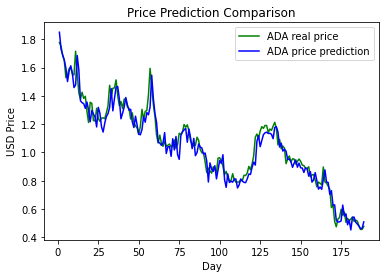

In [76]:
plot_predictions(y_test_ada, df_prediction_ada, 'ADA real price', 'ADA price prediction')

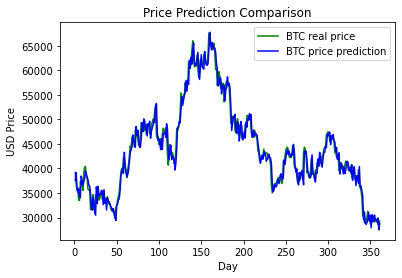

In [77]:
plot_predictions(y_test_btc, df_prediction_btc, 'BTC real price', 'BTC price prediction')

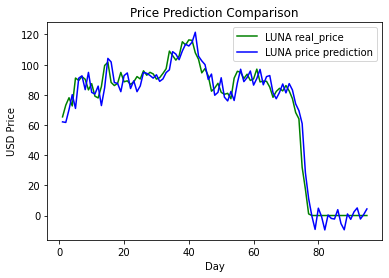

In [78]:
plot_predictions(y_test_luna1, df_prediction_luna1, 'LUNA real_price', 'LUNA price prediction')

# Prediction of the next day

In [79]:
# Creating a dictionary to store the predictions
dict_predictions = {}

In [80]:
# Storing the predictions
dict_predictions.update({crypto_indices[0]:df_prediction_ada['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[1]:df_prediction_atom['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[2]:df_prediction_avax['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[3]:df_prediction_axs['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[4]:df_prediction_btc['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[5]:df_prediction_eth['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[6]:df_prediction_link['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[7]:df_prediction_luna1['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[8]:df_prediction_matic['close'].tail(1).values[0]})
dict_predictions.update({crypto_indices[9]:df_prediction_sol['close'].tail(1).values[0]})

In [81]:
dict_predictions

{'ADA-USD': 0.5085652587705087,
 'ATOM-USD': 8.494227621689234,
 'AVAX-USD': 20.271743848768807,
 'AXS-USD': 17.54742852600014,
 'BTC-USD': 28832.49086364791,
 'ETH-USD': 1793.755061674573,
 'LINK-USD': 6.478047643042345,
 'LUNA1-USD': 4.370240786295905,
 'MATIC-USD': 1.4685400099988184,
 'SOL-USD': 49.987205497478655}